## Import the required libraries and the utility modules

In [ ]:
#pip install tabulate

In [35]:
#Custom libraries
#Data formating library
from datainspection1 import getStatisticsOfData
from dataformatinglibrary import createExcelFromArray

from dataloadinglibrary import loadCSV

from Inputs import getLabelName
from Inputs import getPathToTrainingAndTestingDataSets
from Inputs import modelPerformanceReport
from Inputs import defineArrayOfModels

from utilss3 import compareModels
from utilss3 import performPreprocessingBuildModelsAndEvaluateAccuracy

In [36]:
#First step: Feature selection
print('**************************************************************************************************************************')
print('**************************************************** First step: Feature selection ***************************************')
print('\nFeature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset  and then applying machine learning algorithms for the better performance of the model. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.')
print('\nBroadly there are three groups of feature selection techniques \n\t1. Univariate Selection \n\t2. Feature Importance \n\t3. Correlation Matrix with Heatmap \n\t4. Embedded methods')
print('\n************************************************************************************************************************')

#Second step: Feature encoding
print('**************************************** Second step: Encode the categorical features **********************************')
print('\nMost of the Machine learning algorithms can not handle categorical variables unless they are converted to numerical values and many algorithm’s performance varies based on how Categorical variables are encoded.')
print('\nHere are most commonly used feature encoding techniques \n\t1. One-hot encoding \n\t2. Label Encoding \n\t3. Binary encoding \n\t4. Mean encoding \n\t5. Frequency encoding')
print('\n************************************************************************************************************************')

#Third step: Apply feature scaling after feature encoding
print('*************************************************** Third step: Feature Sacline ****************************************')
print('\nFeature Scaling is a technique to standardize the independent features present in the data in a fixed range. Feature scaling should be done, so that no feature (with large values) will dominate the other features.')
print('\nHere are most commonly used feature scaling techniques \n\t1. Min-Max Scaling \n\t2. Standardization \n\t3. Binarizing \n\t4. Normalizing')
print('\n************************************************************************************************************************')

#Fourth step: Apply clasification
print('********************************************* Fourth step: Apply Classification ****************************************')
print('\nHere are classification techniques that are used \n\t1. DecisonTree \n\t2. RandomForestClassifier \n\t3. ExtraTreesClassifier \n\t4. LogisticRegressionRegression \n\t5. LinearDiscriminantAnalysis \n\t6. GuassianNaiveBayes \n\t7. KNeighborsClassifier \n\t8. SVM \n\t9. DNN')
print('\n************************************************************************************************************************')


**************************************************************************************************************************
**************************************************** First step: Feature selection ***************************************

Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset  and then applying machine learning algorithms for the better performance of the model. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.

Broadly there are three groups of feature selection techniques 
	1. Univariate Selection 
	2. Feature Importance 
	3. Correlation Matrix with Heatmap 
	4. Embedded methods

************************************************************************************************************************
**************************************** Second step: Encode the categorical features **********************************

Most

### Load the training dataset and check the statistics

In [37]:
#Define file names and call loadCSV to load the CSV files
trainingFileNameWithAbsolutePath, testingFileNameWithAbsolutePath = getPathToTrainingAndTestingDataSets()
trainingDataSet = loadCSV(trainingFileNameWithAbsolutePath)
difficultyLevel = trainingDataSet.pop('difficulty_level')
labelName = getLabelName()
label = trainingDataSet[labelName]

#Look at the statistics of the dataSet
getStatisticsOfData(trainingDataSet)
print("\n***** Here is how to training dataset looks like before performing any pre-processing *****")
trainingDataSet.head()

***** Start checking the statistics of the dataSet *****

***** Shape (number of rows and columns) in the dataset:  (25191, 42)
***** Total number of features in the dataset:  41
***** Number of categorical features in the dataset:  3
***** Number of numerical features in the dataset:  38

***** Names of categorical features in dataset *****

| Categorical features in dataset   |
|-----------------------------------|
| Protocol_type                     |
| Flag                              |
| Service                           |


***** Names of numerical features in dataset *****

| Numerical features in the dataset   |
|-------------------------------------|
| Duration                            |
| Src_bytes                           |
| Dst_bytes                           |
| Land                                |
| Wrong_fragment                      |
| Urgent                              |
| Hot                                 |
| Num_failed_logins                   |
| Logged_in

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


### Load the testing dataset and check the statistics

In [38]:
#Define file names and call loadCSV to load the CSV files
testingDataSet = loadCSV(testingFileNameWithAbsolutePath)
difficultyLevel = testingDataSet.pop('difficulty_level')

#Look at the statistics of the dataSet
getStatisticsOfData(testingDataSet)
print("\n***** Here is how to testing dataset looks like before performing any pre-processing *****")
testingDataSet.head()

***** Start checking the statistics of the dataSet *****

***** Shape (number of rows and columns) in the dataset:  (11850, 42)
***** Total number of features in the dataset:  41
***** Number of categorical features in the dataset:  3
***** Number of numerical features in the dataset:  38

***** Names of categorical features in dataset *****

| Categorical features in dataset   |
|-----------------------------------|
| Protocol_type                     |
| Flag                              |
| Service                           |


***** Names of numerical features in dataset *****

| Numerical features in the dataset   |
|-------------------------------------|
| Duration                            |
| Src_bytes                           |
| Dst_bytes                           |
| Land                                |
| Wrong_fragment                      |
| Urgent                              |
| Hot                                 |
| Num_failed_logins                   |
| Logged_in

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd
1,0,udp,private,SF,44,0,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable
3,0,udp,private,SF,53,55,0,0,0,0,...,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap


### Perform pre-processing, training, evaluation and persist the models

[['FeatureSelectionTechnique', 'FeatureEncodingTechnique', 'FeatureNormalizationTechnique', 'ClassificationTechnique', 'TrainAccuraccy', 'TestAccuraccy', 'ModelName', 'ModelFileName'], ['ExtraTreesClassifier', 'OneHotEncoder', 'Standardization', 'DecisonTree'], ['ExtraTreesClassifier', 'OneHotEncoder', 'Standardization', 'RandomForestClassifier'], ['ExtraTreesClassifier', 'OneHotEncoder', 'Standardization', 'ExtraTreesClassifier'], ['ExtraTreesClassifier', 'OneHotEncoder', 'Standardization', 'KNN']]
***************************************************************************************************************************
********************************************* Building Model- 1  As Below *************************************************
	 -- Feature Selection: 	  ExtraTreesClassifier  
	 -- Feature Encoding: 	  OneHotEncoder  
	 -- Feature Scaling: 	  Standardization  
	 -- Classification: 	  DecisonTree 

completeDataSet.shape:  (37041, 43)
completeDataSet.head:     Duration Pro

****** Start classification training using DecisionTreeClassifier *****

*** Classification accuracy score during model training:  0.9987401007919366
*** Classification accuracy score during model testing:  0.8164945670513599
Number of misclassified attacks:  2719
Percentage of misclassified attacks:  18.350543294864007
-------------------------------------------------- Confusion Matrix --------------------------------------------------


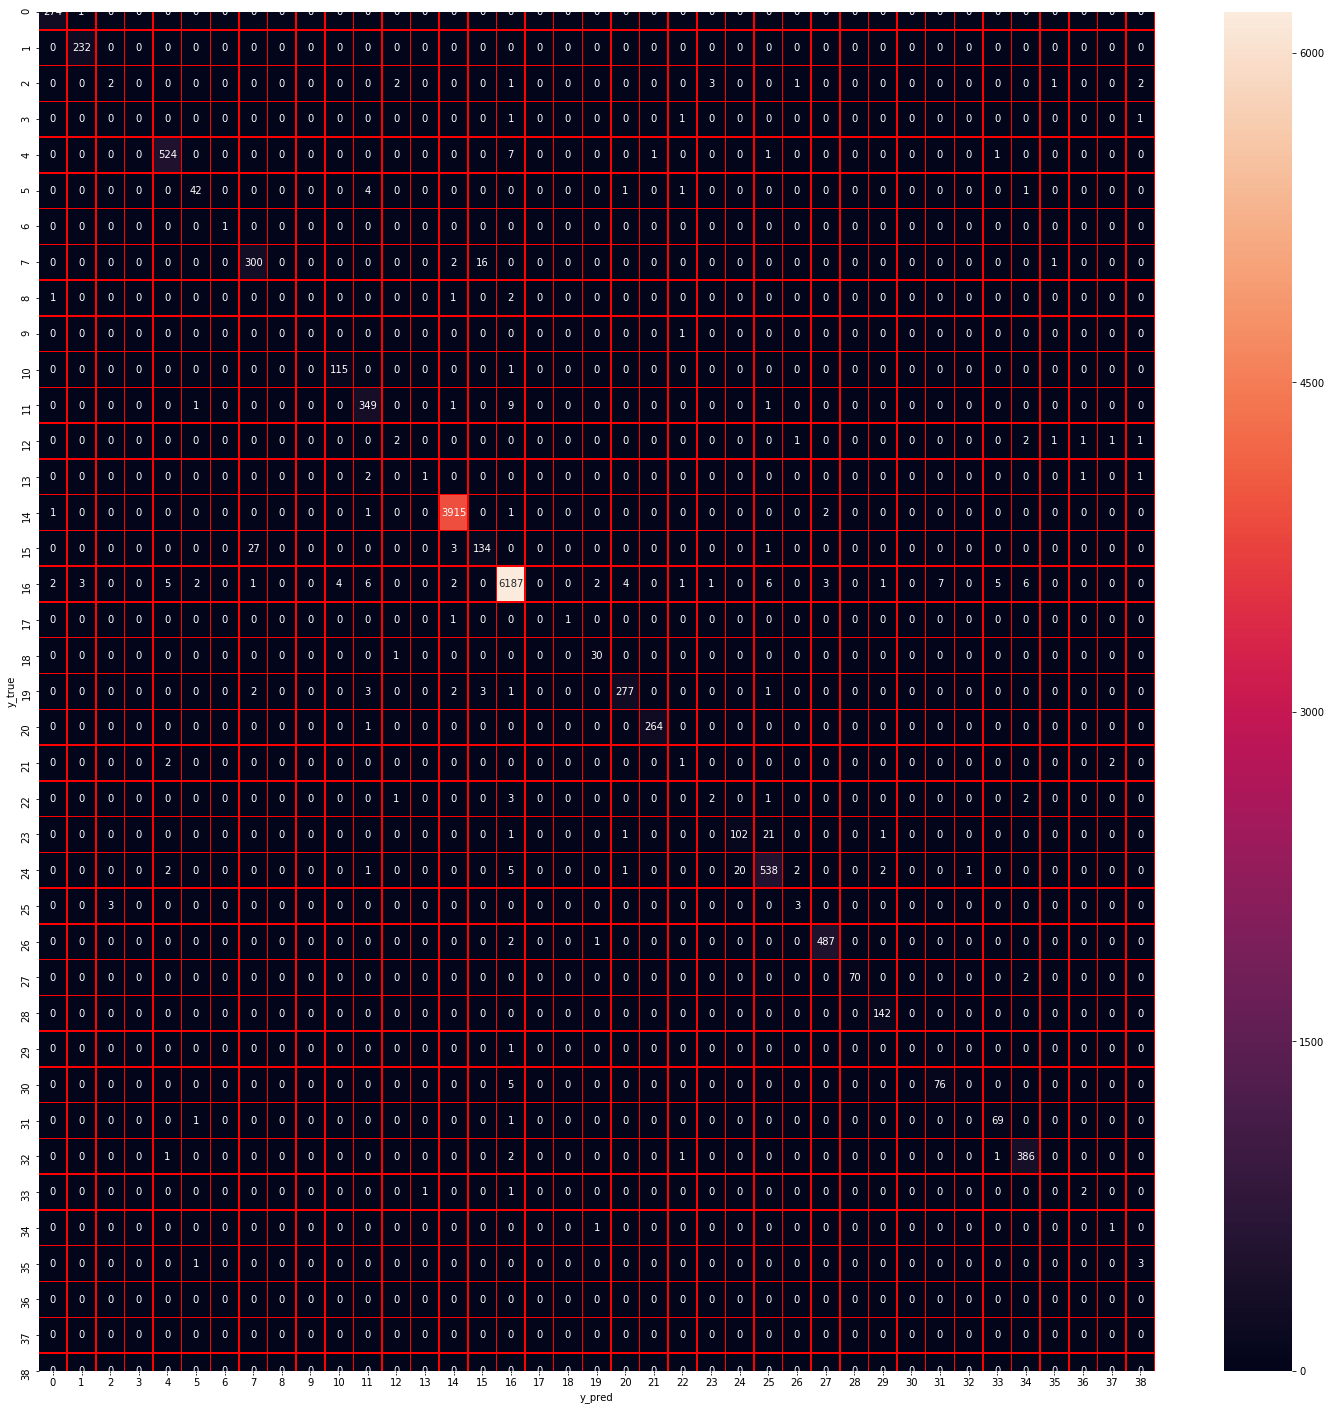


****** End classification training using DecisionTreeClassifier *****

***************************************************************************************************************************
********************************************* Building Model- 2  As Below *************************************************
	 -- Feature Selection: 	  ExtraTreesClassifier  
	 -- Feature Encoding: 	  OneHotEncoder  
	 -- Feature Scaling: 	  Standardization  
	 -- Classification: 	  RandomForestClassifier 

completeDataSet.shape:  (37041, 43)
completeDataSet.head:     Duration Protocol_type  Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   Wrong_f

scaledFeatures.head():     Protocol_type   Service      Flag  Src_bytes  Logged_in     Count  \
0       2.038571  0.629977  0.735369  -0.011190  -0.732914 -0.581217   
1      -0.154786  0.938904 -0.660992  -0.011262  -0.732914  0.275339   
2      -0.154786 -0.543948  0.735369  -0.011147   1.364417 -0.643512   
3      -0.154786 -0.543948  0.735369  -0.011163   1.364417 -0.448840   
4      -0.154786  0.938904 -2.057353  -0.011262  -0.732914  0.259766   

   Serror_rate  Srv_serror_rate  Same_srv_rate  Diff_srv_rate  Dst_host_count  \
0    -0.556584        -0.552030      -1.421427       0.233303        0.656445   
1     1.851192         1.851769      -1.491319      -0.092358        0.656445   
2    -0.075029        -0.071270       0.721924      -0.377312       -1.709884   
3    -0.556584        -0.552030       0.721924      -0.377312        0.656445   
4    -0.556584        -0.552030      -1.235049      -0.133066        0.656445   

   Dst_host_srv_count  Dst_host_same_srv_rate  Dst_host_

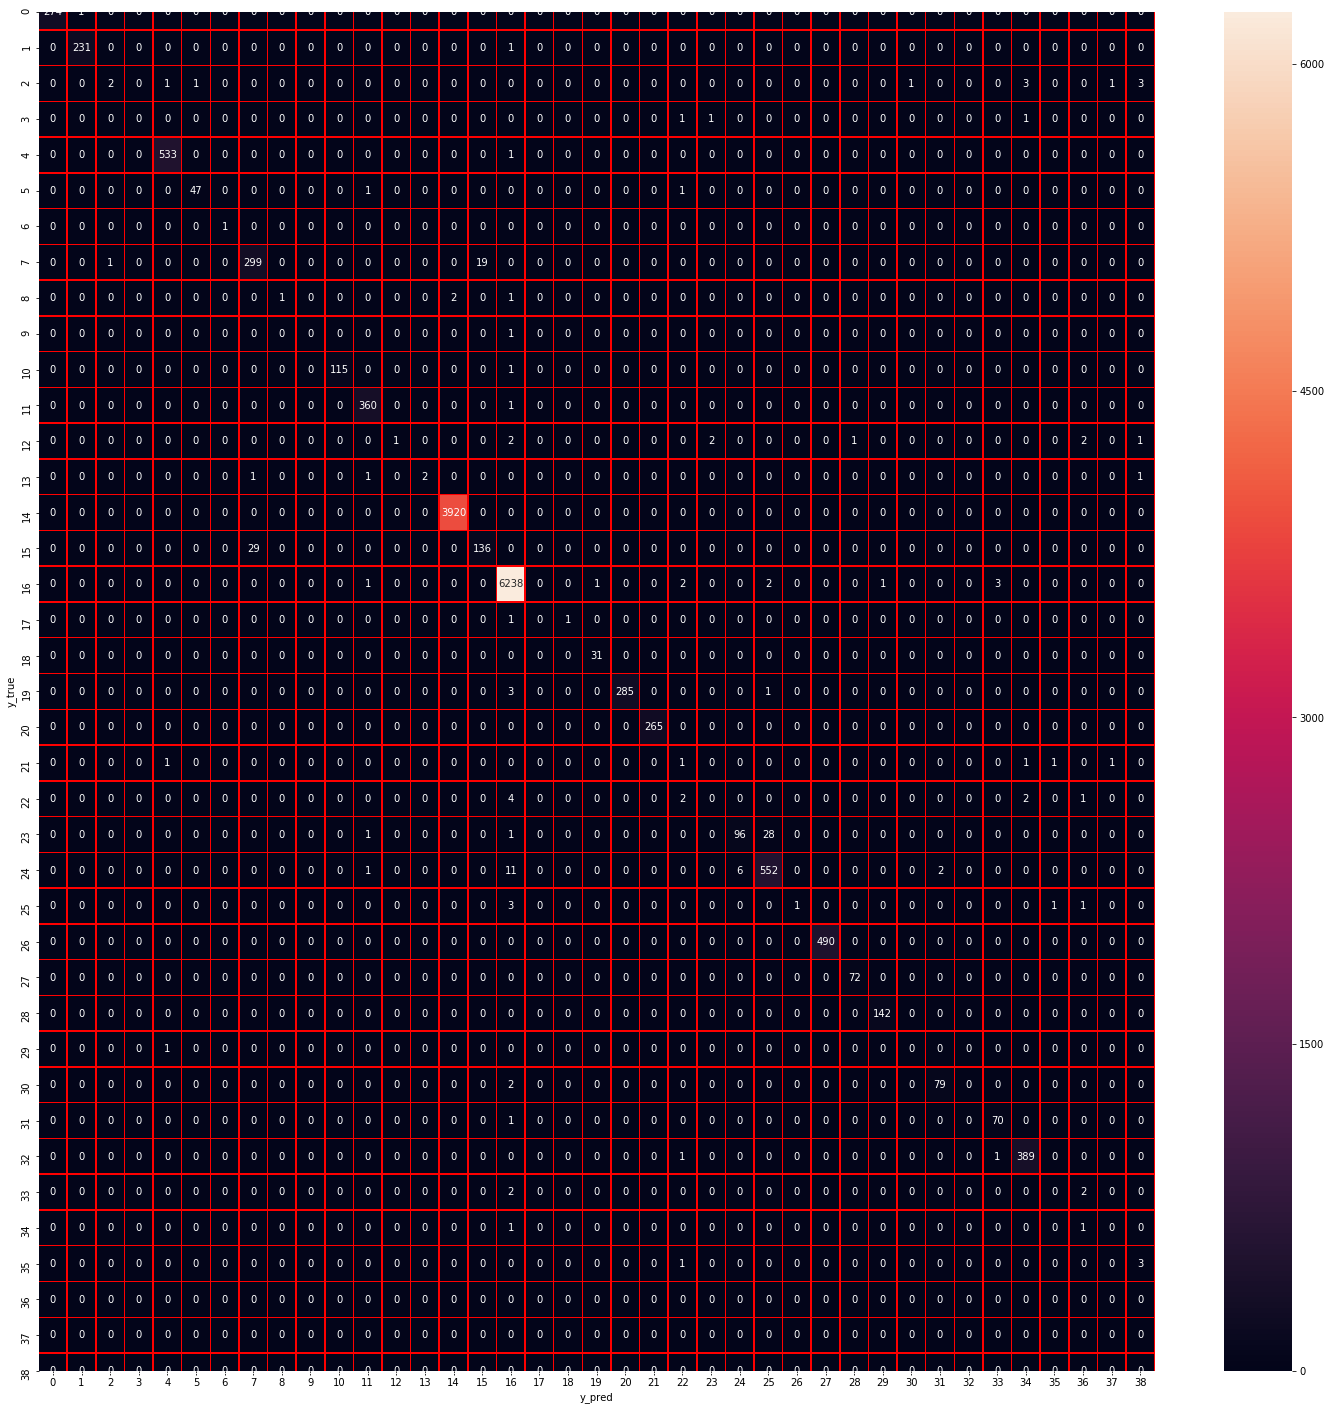


****** End classification training using RandomForestClassifier *****

***************************************************************************************************************************
********************************************* Building Model- 3  As Below *************************************************
	 -- Feature Selection: 	  ExtraTreesClassifier  
	 -- Feature Encoding: 	  OneHotEncoder  
	 -- Feature Scaling: 	  Standardization  
	 -- Classification: 	  ExtraTreesClassifier 

completeDataSet.shape:  (37041, 43)
completeDataSet.head:     Duration Protocol_type  Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   Wrong_fra

****** Start classification training using ExtraTreesClassifier *****
trainingEncodedAndScaledDataset.shape:  (22224, 21)

*** Classification accuracy score during model training:  0.9987401007919366
testingEncodedAndScaledDataset.shape:  (14817, 21)
*** Classification accuracy score during model testing:  0.8202740095835864

****** End classification training using ExtraTreesClassifier *****

***************************************************************************************************************************
********************************************* Building Model- 4  As Below *************************************************
	 -- Feature Selection: 	  ExtraTreesClassifier  
	 -- Feature Encoding: 	  OneHotEncoder  
	 -- Feature Scaling: 	  Standardization  
	 -- Classification: 	  KNN 

completeDataSet.shape:  (37041, 43)
completeDataSet.head:     Duration Protocol_type  Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           udp    other   SF        146          


*** Classification accuracy score during model training:  0.9986501079913607
testingEncodedAndScaledDataset.shape:  (14817, 21)
*** Classification accuracy score during model testing:  0.8168320172774516

****** End classification training using KNeighborsClassifier *****



In [39]:
arrayOfModels = defineArrayOfModels()
performPreprocessingBuildModelsAndEvaluateAccuracy(trainingDataSet, testingDataSet, arrayOfModels)

### Create a excel report with the details of the models and their accuries

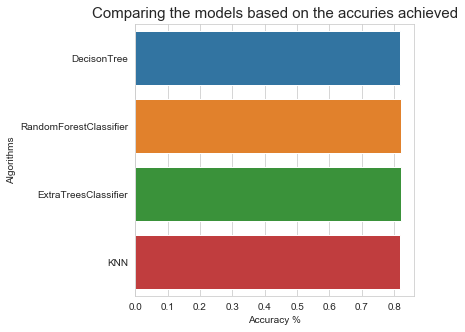

{'RandomForestClassifier': 0.8212188702166431}

In [41]:
#print(arrayOfModels)
fileName = modelPerformanceReport()
createExcelFromArray(arrayOfModels, fileName)
compareModels(arrayOfModels)